# Designing Data Engineering Systems
So far we have introduced a wide range of different approaches towards skalable data storrage, wrangling, data queries, and parallel computing for data analysis and machine learning:
* Hadoop
* Spark
* Data Lakes
* Data Warehouses
* NoSQL Data Bases
* DASK
* RAPIDS
* Ray
* ...

Which combination of these will you chouse to solve a give Data Engineering Problem? 

## Diagrams Lib
*Diagrams* is a nice Python Lib that allows users to design Compute Systems, form Cloud archtectures from widely used hyper-scalers to coustom designes:
 
* Website: https://diagrams.mingrammer.com/
* API: https://diagrams.mingrammer.com/docs/nodes/onprem
* Examples / Tutorial: https://diagrams.mingrammer.com/docs/getting-started/examples

In [1]:
!pip install diagrams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.8 MB 1.2 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
#example

from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram("Advanced Web Service with On-Premise", show=True):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Redis("replica") << metrics
        grpcsvc >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - PostgreSQL("replica") << metrics
        grpcsvc >> primary

    aggregator = Fluentd("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator

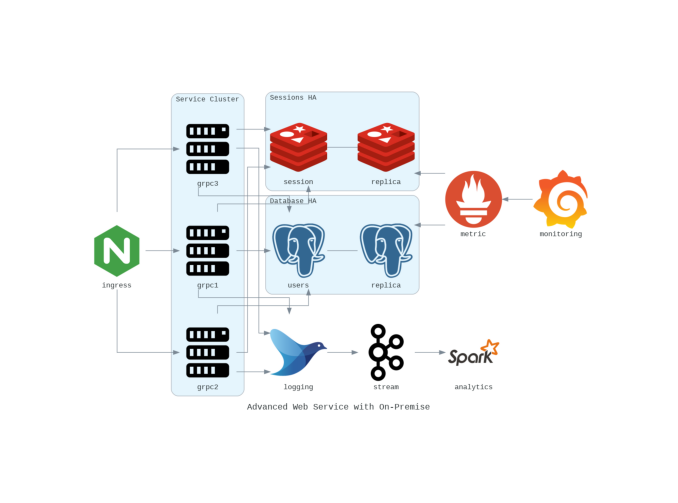

In [3]:
#this generared an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12, 9))
img = mpimg.imread('/content/advanced_web_service_with_on-premise.png')
plt.axis('off')
plt.imshow(img)
plt.show()



## Assignment 1

Design a Learning Data Engineering and System which would allow dveloppers to work on the *Stanford Earthquake Dataset*

* Design an efficient system layout - assume that you can use any frame work we have introduced so far und that you have all the compute ressources you need...
* how an where do you store the raw data?
* how do you do the data wranling?
* how do you store the data for ananlysis and modeling?

Links:
* Data and Problem:  https://www.kaggle.com/datasets/isevilla/stanford-earthquake-dataset-stead
* Use Diagrams to show your system layout

HINT: you will find most of the things you need in the *onprem* module: https://diagrams.mingrammer.com/docs/nodes/onprem

In [12]:
from diagrams.gcp.analytics import Dataflow, BigQuery
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable

with Diagram("Workflow", show=True):
    with Cluster("Data Flow"):
        flow = Dataflow("data flow")

    with Cluster("Data Lake"):
        flow >> [BigQuery("kaggle dataset")]

    with Cluster("Event Driven"):
        with Cluster("Processing"):
            flow >> AppEngine("engine") >> BigTable("bigtable")

        with Cluster("Serverless"):
            flow >> Functions("func") >> AppEngine("appengine")

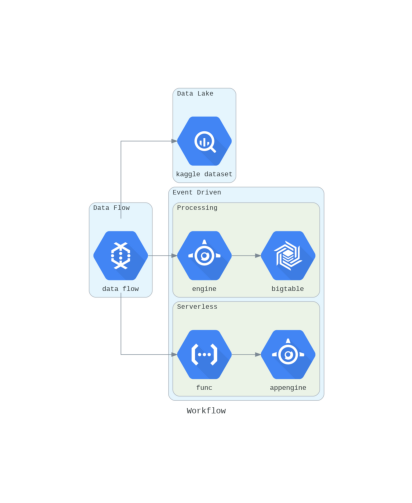

In [13]:
plt.figure(figsize=(12, 9))
img = mpimg.imread('/content/workflow.png')
plt.axis('off')
plt.imshow(img)
plt.show()